<a href="https://colab.research.google.com/github/Adiyasa26/Python_/blob/main/PERANCANGAN_FTTB_TUBES_SKO_ILYAS_ADIYASA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAMA**  : ILYAS ADIYASA

**NIM**   : 1101184270

**KELAS** : TT - 42 - 07


**Skenario Perancangan FTTB**:

Dari **sentral** menuju **ODC** kemudian ke **ONU** kemudian ke **ODP** kemudian ke **Roset**. Satu gedung berisikan 40 lantai, tiap lantai terdapat 20 kamar. Dengan rencana tersebut kami akan menggunakan **6 konektor** dan **2 spliter**, dengan **spliter 1:64** dengan redaman **19.5 dB** untuk **ONU ke ODP** dan spliter **1:32** dengan redaman **16 dB** untuk **ODP ke Roset**. Kami menggunakan **fiber jenis G625D** dengan panjang gelombang **1490 nm** dengan redaman **0.28 dB/Km**. Selain itu, dengan jumlah konektor terdapat 6 dan splitter 2, maka **splicer ada 8** buah yang memiliki redaman **0.1 db**.


In [504]:
import math as m
import matplotlib.pyplot as plt
import numpy as np

In [611]:
#Converter
NtL = lambda x : 10 * np.log10(x)
LtN = lambda x : 10**(x/10)

#Parameter SNR
R = 0.85 #Responsivitas (A/W)
SM = 3 #Safety Margin (dB)
M = -0.23 #Tambahan daya sinyal APD (dB)
q = 1.6*10**-19
id = 200*10**-9 #arus gelap (A)
B = 8*10**9 #Bandwith (Hz)
F = 1 #F(M), Faktor Gain
K = 1.38*10**-23
Teff = 290 #Kelvin
RL = 50 #Ekuivalen Resistansi (Ohm)

#Parameter Pr
#jarak dari sentral ke ONU = 20 km
#jarak dari ONU ke Roset = <500 m --> 4*29 = 116 m 
#jarak total = 20000 + 116 = 20116 m

d = np.arange(0.116,20.117,1) #Jarak (km)
L_fiber = 0.28 #0.28 #Loss dari fiber berdasarkan jenis G625D (dB)  
N_splicer = 8 #Jumlah Splicer
L_splicer = 0.1 #Loss dari splicer (db)
N_connector = 6 #Jumlah Konektor
L_connector = 0.3 #Loss dari konektor (dB)
L_splitter = 16 + 19.5 #loss dari splitter (dB) diambil redaman yang paling kecil, milik 1:32
Pt = 3 #Daya tx (dBm)

In [620]:
#RUMUS PR
def P_receive():
  #Pr,Pt (dBm)
  #L_fiber,N_splitter,L_splicer,N_connector,L_connector,L_splitter (dB)

  hambatan_fiber = d * L_fiber
  hambatan_splicer = N_splicer * L_splicer
  hambatan_connector = N_connector * L_connector

  alfa_total = hambatan_fiber + hambatan_splicer + hambatan_connector + L_splitter + SM
  Pr = Pt - alfa_total
  return Pr

Pr = P_receive()
print('Daya Terima = ', Pr)

Daya Terima =  [-38.13248 -38.41248 -38.69248 -38.97248 -39.25248 -39.53248 -39.81248
 -40.09248 -40.37248 -40.65248 -40.93248 -41.21248 -41.49248 -41.77248
 -42.05248 -42.33248 -42.61248 -42.89248 -43.17248 -43.45248 -43.73248]


In [621]:
#Arus Primer
def arus_primer():
  Pr_num = LtN(Pr)
  ip = Pr_num * R
  return ip
ip = arus_primer()
print("Ip = ", ip)

Ip =  [1.30668506e-04 1.22509827e-04 1.14860559e-04 1.07688896e-04
 1.00965018e-04 9.46609646e-05 8.87505240e-05 8.32091194e-05
 7.80137089e-05 7.31426895e-05 6.85758068e-05 6.42940710e-05
 6.02796783e-05 5.65159361e-05 5.29871945e-05 4.96787804e-05
 4.65769371e-05 4.36687666e-05 4.09421765e-05 3.83858291e-05
 3.59890950e-05]


In [622]:
#Signal Power
def signal_power():
  Is_kuadrat = (ip*M)**2
  return Is_kuadrat
Is_kuadrat = signal_power()
print('Is^2 = ', Is_kuadrat)

Is^2 =  [9.03228273e-10 7.93957990e-10 6.97906950e-10 6.13475924e-10
 5.39259151e-10 4.74020936e-10 4.16675076e-10 3.66266774e-10
 3.21956742e-10 2.83007225e-10 2.48769724e-10 2.18674188e-10
 1.92219536e-10 1.68965300e-10 1.48524303e-10 1.30556207e-10
 1.14761845e-10 1.00878246e-10 8.86742499e-11 7.79466623e-11
 6.85168713e-11]


In [627]:
#RUMUS SNR
def SNR():
  BDC = 2*q*id*B*(M**2)*F #Dark Current (Numerik)
  SN = 2*q*ip*B*(M**2)*F #Shot Noise (Numerik)
  NT = (4*K*Teff*B)/RL #Noise Thermal (Numerik)
  Signal = Is_kuadrat # (Numerik)
  Noise = BDC + SN + NT # (Numerik)

  SNR = Signal / Noise
  SNR_dBm = NtL(SNR)
  return SNR_dBm

SNR = SNR()
print(SNR)

[25.4434572  24.88531818 24.32706369 23.76870085 23.21023634 22.65167646
 22.09302709 21.53429378 20.97548171 20.41659576 19.85764052 19.29862027
 18.73953904 18.18040063 17.62120858 17.06196622 16.50267667 15.94334286
 15.38396756 14.82455333 14.2651026 ]


In [628]:
#RUMUS Q
def Q_rumus():
  Q_rumus = 0.5*(10**(SNR/20))
  return Q_rumus
Q = Q_rumus()
print(Q)

[9.35713434 8.77477347 8.22854766 7.71622791 7.23572115 6.78506211
 6.36240571 5.96601984 5.59427859 5.24565582 4.9187192  4.61212445
 4.32461008 4.05499232 3.80216039 3.56507208 3.34274954 3.13427535
 2.93878884 2.75548259 2.58359916]


In [629]:
#RUMUS BER
pengkali_list = []
def BER_rumus():
  akar = 1/(Q * m.sqrt(2 * m.pi))
  for i in range(len(Q)):
    pengkali = m.exp(-(Q[i]**2)/2)
    pengkali_list.append(pengkali)
  BER = (1/akar)*(pengkali_list)
  return BER
BER = BER_rumus()
print(BER)

[2.27875167e-18 4.19484446e-16 4.08875734e-14 2.27777413e-12
 7.75683450e-11 1.71325302e-09 2.58550965e-08 2.79104989e-07
 2.24390361e-06 1.39209771e-05 6.87583361e-05 2.77908437e-04
 9.41660577e-04 2.73234783e-03 6.91747918e-03 1.55336496e-02
 3.13903416e-02 5.78151480e-02 9.81455342e-02 1.55080489e-01
 2.30070310e-01]


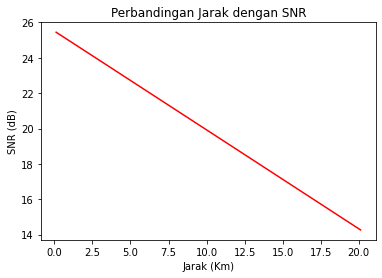

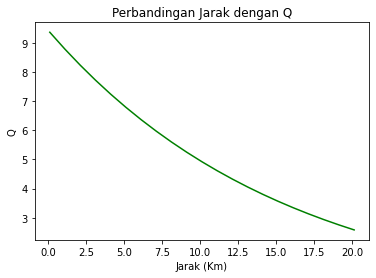

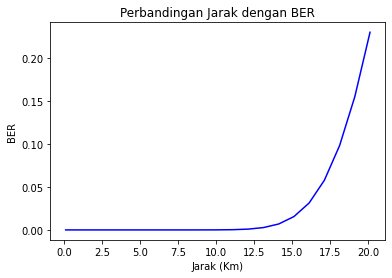

In [630]:
#GRAFIK
def grafik_1():
  plt.figure()
  plt.plot(d,SNR,'r')
  plt.title('Perbandingan Jarak dengan SNR')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('SNR (dB)')
  plt.show()

def grafik_2():
  plt.figure()
  plt.plot(d,Q,'g')
  plt.title('Perbandingan Jarak dengan Q')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('Q')
  plt.show()

def grafik_3():
  plt.figure()
  plt.plot(d,BER,'b')
  plt.title('Perbandingan Jarak dengan BER')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('BER')
  plt.show()

grafik_1()
grafik_2()
grafik_3()